In [1]:
%matplotlib inline

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import nltk package
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score

import seaborn as sns

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#kmeans
from sklearn.cluster import KMeans

In [2]:
# Download the NLTK English tokenizer and the stopwords of all languages
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jordynohashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jordynohashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Prep

In [3]:
directory = os.getcwd()

In [4]:
tweet_dir = os.path.join(directory,'tweets.csv')

In [5]:
tweets = pd.read_csv(tweet_dir, encoding='latin-1')
tweets.columns = ['Polarity', 'ID', 'Date', 'Flag', 'User', 'Text']

In [6]:
tweets.drop(['Flag', 'ID'], axis=1, inplace=True)
tweets.head()

,Polarity,Date,User,Text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [7]:
tweets1 = tweets[0:5000] 
tweets2 = tweets[905000:910000]

# tweets = tweets1.add(tweets2, fill_value=0)

tweets = [tweets1, tweets2]
  
tweets = pd.concat(tweets)

tweets.head()
#tweets.shape

,Polarity,Date,User,Text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [8]:
# re encode positive tweets to 1 instead of 4
def encode(label):
    if label == 0:
        return 0
    elif label == 4:
        return 1

In [9]:
tweets['Polarity'] = tweets.apply(lambda x: encode(x['Polarity']), axis=1)

In [10]:
tweets.head()

,Polarity,Date,User,Text
0,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


## Count Vectorizer

In [11]:
cvectorizer = CountVectorizer(analyzer='word', max_features=2000, 
                             tokenizer=word_tokenize, stop_words= stopwords.words('english'))

In [12]:
df_count_Y = np.array(tweets['Polarity'])
df_count_Y.shape

(10000,)

In [13]:
# vocabulary
cvectorizer.fit(tweets["Text"])
# print("Unique words: ", cvectorizer.vocabulary_)

CountVectorizer(max_features=2000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7fc497bac1f0>)

In [14]:
df_count_X = cvectorizer.transform(tweets["Text"]).toarray()
df_count_X.shape
# should be (10000, 2000)

(10000, 2000)

In [15]:
# features 
#df_X = vectorizer.fit_transform(tweets["Text"]).toarray()

In [16]:
df_train_count_X, df_test_count_X, df_train_count_Y, df_test_count_Y = train_test_split(df_count_X, df_count_Y, test_size= .2, random_state= 200)


## TF-IDF Vectorizer

In [17]:
tfidf = TfidfVectorizer(sublinear_tf=True, analyzer='word', max_features=2000,tokenizer=word_tokenize)

In [18]:
df_tfidf_Y = np.array(tweets['Polarity'])
df_tfidf_Y.shape

(10000,)

In [19]:
# vocabulary
tfidf.fit(tweets["Text"])
# print("Unique words: ", tfidf.vocabulary_)

TfidfVectorizer(max_features=2000, sublinear_tf=True,
                tokenizer=<function word_tokenize at 0x7fc497bac1f0>)

In [20]:
df_tfidf_X = tfidf.transform(tweets["Text"]).toarray()
df_tfidf_X.shape
# should be (10000, 2000)

(10000, 2000)

In [21]:
#df_tfidf_X = tfidf.fit_transform(tweets['Text']).toarray()

In [22]:
df_train_tfidf_X, df_test_tfidf_X, df_train_tfidf_Y, df_test_tfidf_Y = train_test_split(df_tfidf_X, df_tfidf_Y, test_size= .2, random_state= 200)


## PCA & Kmeans w/ count

In [23]:
#scale data
scaler = StandardScaler()
df_count_X_scale = scaler.fit_transform(df_count_X)
# df_test_count_X_scale = scaler.fit_transform(df_test_count_X)

In [24]:
pca = PCA(2)
pca_count = pca.fit_transform(df_count_X_scale)

In [25]:
kmeans = KMeans(n_clusters=2, max_iter=400, algorithm = 'auto')
# fitting kmeans model
fitted_count = kmeans.fit(pca_count)

#predicting clusters
prediction_count = kmeans.predict(pca_count)

In [26]:
prediction_count.shape

(8000,)

In [27]:
target_names = ['negative', 'positive']
print(classification_report(df_count_Y,prediction_count,target_names=target_names))

              precision    recall  f1-score   support

    negative       0.50      0.95      0.66      3997
    positive       0.58      0.07      0.13      4003

    accuracy                           0.51      8000
   macro avg       0.54      0.51      0.39      8000
weighted avg       0.54      0.51      0.39      8000



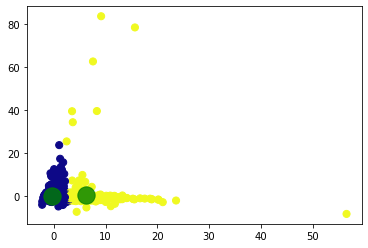

In [31]:
# Plotting scatter plot
plt.scatter(pca_count[:, 0], pca_count[:, 1],c=prediction_count ,s=50, cmap='plasma')  
center2_count = fitted_count.cluster_centers_ 
plt.scatter(center2_count[:, 0], center2_count[:, 1],c='green', s=300, alpha=0.8)


In [32]:
df_count_pca = PCA().fit(df_count_X_scale)

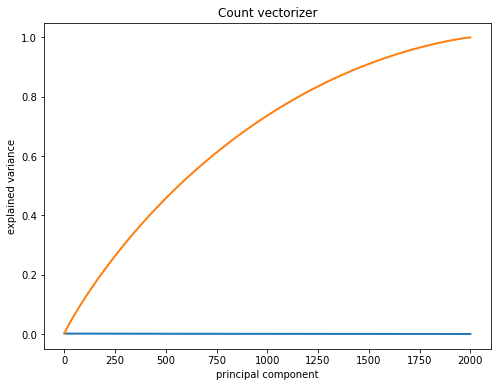

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, df_count_pca.n_components_+1)

ax.plot(x_values, df_count_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(df_count_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Count vectorizer')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

## PCA & Kmeans w/ TD-IDF

In [34]:
#scale data
scaler = StandardScaler()
df_tfidf_X_scale = scaler.fit_transform(df_tfidf_X)
# df_test_tfidf_X_scale = scaler.fit_transform(df_test_tfidf_X)

In [35]:
pca = PCA(2)
pca_tfidf = pca.fit_transform(df_tfidf_X_scale)

In [36]:
kmeans = KMeans(n_clusters=2, max_iter=400, algorithm = 'auto')
# fitting kmeans model
fitted_tfidf = kmeans.fit(pca_tfidf)

#predicting clusters
prediction_tfidf = kmeans.predict(pca_tfidf)

In [37]:
prediction_tfidf.shape

(8000,)

In [38]:
target_names = ['negative', 'positive']
print(classification_report(df_tfidf_Y,prediction_tfidf,target_names=target_names))

              precision    recall  f1-score   support

    negative       0.42      0.05      0.09      3997
    positive       0.50      0.93      0.65      4003

    accuracy                           0.49      8000
   macro avg       0.46      0.49      0.37      8000
weighted avg       0.46      0.49      0.37      8000



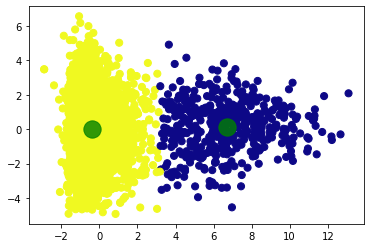

In [40]:
# Plotting scatter plot
plt.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1],c=prediction_tfidf ,s=50, cmap='plasma')  
center2_tfidf = fitted_tfidf.cluster_centers_ 
plt.scatter(center2_tfidf[:, 0], center2_tfidf[:, 1],c='green', s=300, alpha=0.8)


In [41]:
df_tdidf_pca = PCA().fit(df_tfidf_X_scale)

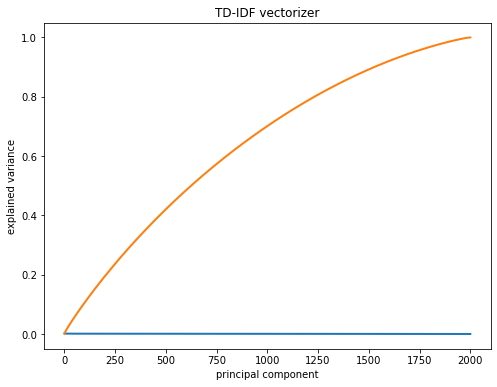

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, df_tdidf_pca.n_components_+1)

ax.plot(x_values, df_tdidf_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(df_tdidf_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('TD-IDF vectorizer')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

## SVM w/ count

In [43]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, y)
    return clf

In [44]:
df_count_clf = train_SVM(df_train_count_X, df_train_count_Y)

In [45]:
# df_pred_train_count_Y = df_count_clf.predict(df_train_count_X)
df_pred_test_count_Y = df_count_clf.predict(df_test_count_X)

In [50]:
target_names = ['negative', 'positive']
print(classification_report(df_test_count_Y,df_pred_test_count_Y,target_names=target_names))


              precision    recall  f1-score   support

    negative       0.73      0.71      0.72      1003
    positive       0.72      0.74      0.73       997

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.72      2000
weighted avg       0.73      0.72      0.72      2000



## SVM w/ TF-IDF

In [47]:
df_tfidf_clf = train_SVM (df_train_tfidf_X, df_train_tfidf_Y)

In [48]:
df_pred_train_tfidf_Y = df_tfidf_clf.predict(df_train_tfidf_X)
df_pred_test_tfidf_Y = df_tfidf_clf.predict(df_test_tfidf_X)

In [51]:
target_names = ['negative', 'positive']
print(classification_report(df_test_tfidf_Y, df_pred_test_tfidf_Y,target_names=target_names))

              precision    recall  f1-score   support

    negative       0.75      0.75      0.75      1003
    positive       0.75      0.75      0.75       997

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



## Training errors analysis (TD-IDF)

In [ ]:
# Draw the heatmap of training errors.
def draw_heatmap(training_errors):
    # training_errors: A NumPy array with the shape (len(C_list), len(gamma_list))
    # gamma_list: List of gamma(s).
    # C_list: List of C(s).
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(training_errors, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("error")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title('Training error w.r.t $C$ and $\gamma$')
    plt.show()

In [56]:
C_list = [1, 10, 100, 1000, 10000]
gamma_list = [1e-6, 1e-5, 1e-4, 1e-3,1e-2]
classifier = svm.SVC(kernel='rbf')
search_results =  GridSearchCV(classifier, {'C':C_list, 'gamma': gamma_list, 'kernel': ['rbf']}) #########

search_results.fit(df_train_tfidf_X,df_train_tfidf_Y)

KeyboardInterrupt: 

In [ ]:
# here's how we can extract all the same information from the search_results data structure

# first get the parameters used in the order they were used
results = pd.DataFrame( search_results.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we use 1 - x
results['score'] = 1 - search_results.cv_results_['mean_test_score']

# turn a long table into a 2-D table with C being the 1st axis (y-axis) and gamma as the 2nd (x-axis)
results = results.pivot('C','gamma','score')

# and plot it
# using the dataframe means we don't need the wrapper fct around sns.heatmap we used before
sns.heatmap(results,annot=True, fmt='.3f') 
plt.title('Training error w.r.t $C$ and $\gamma$')
plt.show()

In [ ]:
# extract the best estimator and its params
opt_classifier = search_results.best_estimator_
opt_C = search_results.best_params_['C']
opt_gamma = search_results.best_params_['gamma']

# just a copy/paste of test set evaluation from before
opt_classifier.fit(df_train_tfidf_X,df_train_tfidf_Y)
opt_test_score = 1 - opt_classifier.score(df_test_tfidf_X,df_test_tfidf_Y) # again turn accuracy into misclassification error
print(f'Test set error for optimum classifier(C={opt_C},gamma={opt_gamma}): {opt_test_score:.3f}') 
